In [3]:
#!pip install seaborn
#!pip install glob2
#!pip install seaborn

Downloading/unpacking seaborn
  Running setup.py (path:/tmp/pip-build-HfUunj/seaborn/setup.py) egg_info for package seaborn
  Running setup.py install for seaborn
  Could not find .egg-info directory in install record for seaborn
Cleaning up...
Downloading/unpacking glob2
Cleaning up...
Cleaning up...


In [4]:
import pandas as pd
%pylab inline
import seaborn as sns
import glob2
#Trying to work out a safety for natsort
from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns

Populating the interactive namespace from numpy and matplotlib


In [5]:
columns2 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'ndp.subzone',
            'ndp.lRidge', 'ndp.rRidge', 'realtime']

In [6]:
rdir = '../../../temp_results'

t2 = rdir + '/results_modelT_2.dat'
t5 = rdir + '/results_modelT_5.dat'
t6 = rdir + '/results_modelT_6.dat'




dft2 = pd.read_csv(t2, sep="\s*", header=None,  index_col=False).dropna() 
dft5 = pd.read_csv(t5, sep="\s*", header=None,  index_col=False).dropna() 
dft6 = pd.read_csv(t6, sep="\s*", header=None,  index_col=False).dropna() 


dft2.columns = columns2
dft5.columns = columns2
dft6.columns = columns2


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


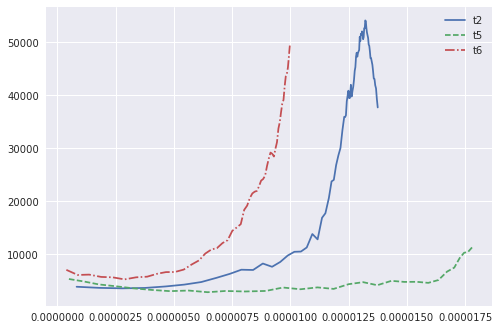

In [7]:
plt.plot(dft2['realtime'], np.sqrt(dft2['rmsSurf']),  linestyle="-", label='t2')
plt.plot(dft5['realtime'], dft5['rmsSurf'],  linestyle="--", label='t5')
plt.plot(dft6['realtime'], dft6['rmsSurf'],  linestyle="-.", label='t6')



plt.legend()

In [8]:
t13 = rdir + '/results_modelT_13.dat'
dft13 = pd.read_csv(t13, sep="\s*", header=None,  index_col=False).dropna() 
dft13.columns = columns2

#python garel_devel.py 13 md.RES=192 md.elementType="Q1/dQ0" dp.MANTLETOCRUST*=0.75 
#md.ppc=50 md.courantFac=1.0 dp.low_mantle_visc_fac=1.0


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [9]:
dft13['rmsSurfScaled'] = (dft13['rmsSurf']/(2900.*1e3/1e-6))*(10.*3600*24*365)

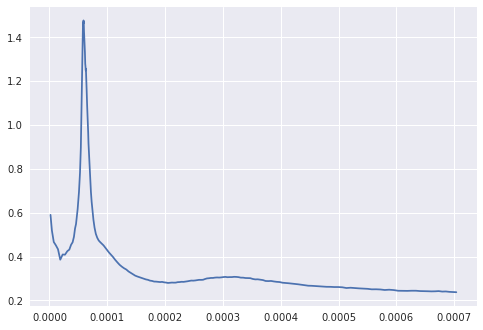

In [10]:
plt.plot(dft13['realtime'], np.sqrt(dft13['rmsSurfScaled']),  linestyle="-", label='t13')
